In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import  LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import  mean_absolute_error, mean_squared_error,r2_score,max_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [37]:
# df= pd.read_csv('../0.Datasets/processed/processed_car_data.csv')
df= pd.read_csv('../0.Datasets/processed/sliced_car_data.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Chevrolet,Impala,LTZ,Sedan,automatic,2g1165s30f9103921,ca,19.000000,14538.0,silver,black,enterprise vehicle exchange / tra / rental / t...,24300.0,7200.0,Tue,2015-07-07 09:30:00
1,2014,BMW,5 Series,528i,Sedan,automatic,wba5a5c51ed501631,ca,29.000000,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,Tue,2015-02-03 04:30:00
2,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d31e9134662,ca,30.672365,33450.0,black,black,avis rac/san leandro,20100.0,14700.0,Tue,2014-12-16 12:00:00
3,2015,Audi,A3,1.8 TFSI Premium,Sedan,automatic,wauacgff7f1002327,ca,49.000000,5826.0,gray,black,audi north scottsdale,24000.0,23750.0,Thu,2014-12-18 12:30:00
4,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c57ed169262,ca,38.000000,10736.0,black,black,the hertz corporation,67000.0,65000.0,Tue,2015-01-06 12:30:00


In [38]:
x = df[['condition','odometer','mmr']]
x.head()

,condition,odometer,mmr
0,19.000000,14538.0,24300.0
1,29.000000,25969.0,34200.0
2,30.672365,33450.0,20100.0
3,49.000000,5826.0,24000.0
4,38.000000,10736.0,67000.0


In [39]:
y = df['sellingprice']
y.head()

0     7200.0
1    30000.0
2    14700.0
3    23750.0
4    65000.0
Name: sellingprice, dtype: float64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=16, test_size= 0.3)

In [41]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [42]:

decision_reg = DecisionTreeRegressor(max_depth= 8)

In [43]:
start = time.time()
decision_reg.fit(x_train_scaled, y_train)
end = time.time()
print(f"Execution time {end - start}")

Execution time 0.002534151077270508


In [44]:
y_predict = decision_reg.predict(x_test_scaled)
y_predict

array([19500., 32500., 34000.,  8500.,  7200., 27500.])

In [45]:
y_test

3     23750.0
17    30500.0
16    59900.0
15     9200.0
12    20750.0
7     32500.0
Name: sellingprice, dtype: float64

In [46]:
mse = mean_squared_error(y_test, y_predict)
print(mse)

150327500.0


In [47]:
mae = mean_absolute_error(y_test, y_predict)
print(mae)

8566.666666666666


In [48]:
print(r2_score(y_test, y_predict))

0.3804540079152018


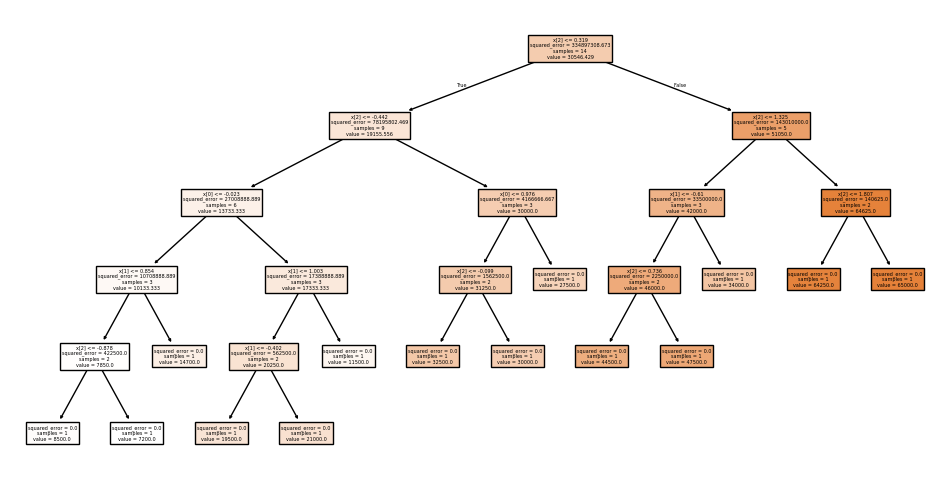

In [49]:

plt.figure(figsize=(12,6))
tree.plot_tree(decision_reg, filled= True)

plt.savefig('./Graph/2.Post_pruned_tree.png')
plt.show()


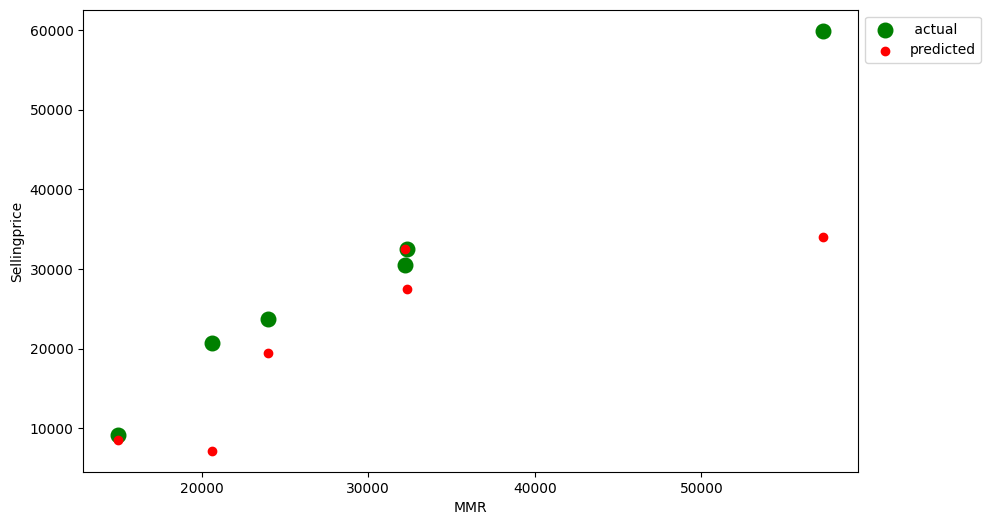

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(x_test['mmr'], y_test, color = 'green', label =' actual', s =110)
plt.scatter(x_test['mmr'], y_predict, color = 'red', label='predicted')

plt.xlabel('MMR')
plt.ylabel('Sellingprice')

plt.legend(bbox_to_anchor = (1,1), loc ='upper left')
plt.savefig('./Graph/2.post_pruned_actual_vs_predicted.png')
plt.show()

# Preprunning

In [51]:
parameters = {
   'criterion':['friedman_mse', 'poisson', 'squared_error', 'absolute_error'], 
    'max_depth':[1,2,3,4,5,6,7,8,9,10],    
    'max_features':[ 'log2','sqrt', None],
     
}

In [52]:
pre_decision_reg = DecisionTreeRegressor(random_state=42)

cv = GridSearchCV(pre_decision_reg, param_grid= parameters, cv=3, scoring='r2')

In [53]:
cv.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'poisson',
                                       'squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['log2', 'sqrt', None]},
             scoring='r2')

In [54]:
cv.best_params_

{'criterion': 'poisson', 'max_depth': 3, 'max_features': None}

In [55]:
y_predict = cv.predict(x_test_scaled)
y_predict

array([20250., 30000., 42000.,  7850.,  7850., 30000.])

In [56]:
print(np.array(y_test))

[23750. 30500. 59900.  9200. 20750. 32500.]


In [57]:
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
print(r2_score(y_test,y_predict))


6441.666666666667
84565416.66666667
0.6514798359261325


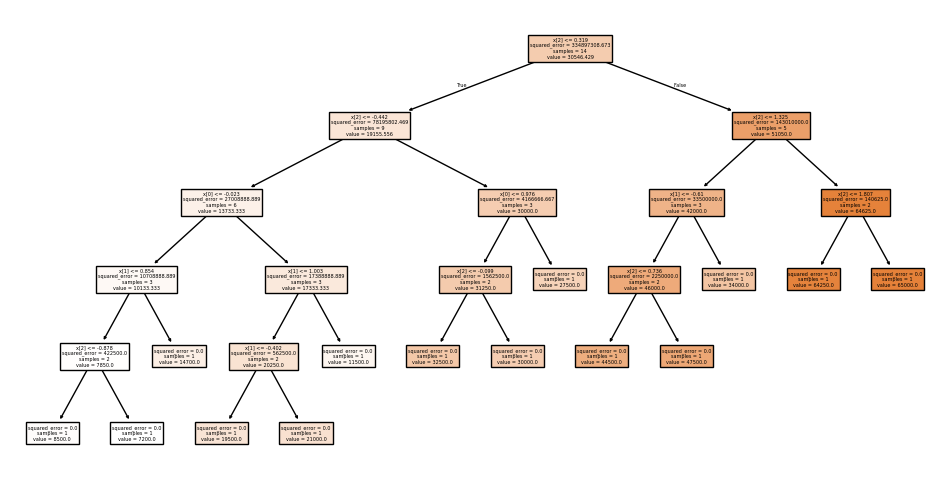

In [58]:

plt.figure(figsize=(12,6))
tree.plot_tree(decision_reg, filled= True)

plt.savefig('./Graph/2.Pre_pruned_tree.png')
plt.show()


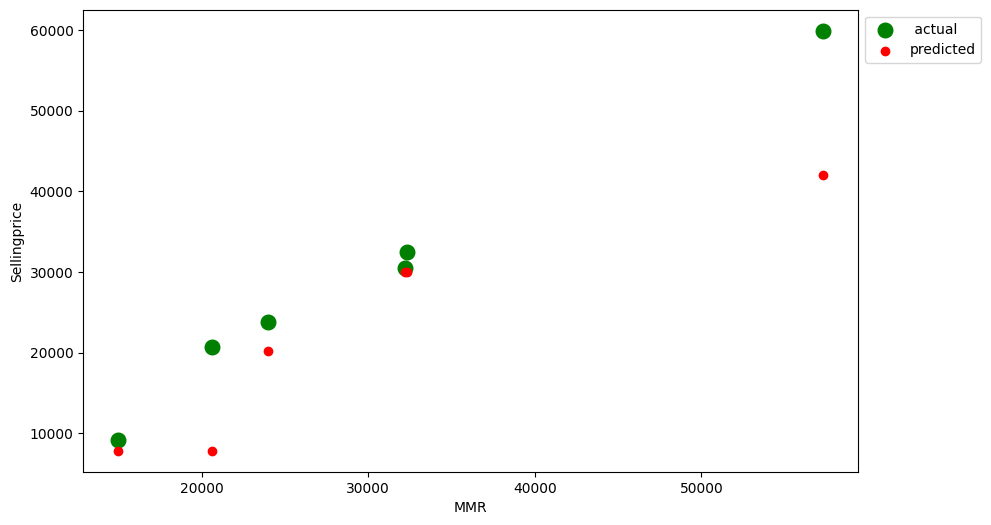

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(x_test['mmr'], y_test, color = 'green', label =' actual', s =110)
plt.scatter(x_test['mmr'], y_predict, color = 'red', label='predicted')

plt.xlabel('MMR')
plt.ylabel('Sellingprice')

plt.legend(bbox_to_anchor = (1,1), loc ='upper left')
plt.savefig('./Graph/2.Prepruned_actual_vs_predicted.png')
plt.show()